Outline:
1. Load dataset
1. Explanatory Data Analysis
1. Preprocessing Data
1. Coba model (linear regression, polynomial regression)
1. Coba teknik regularization (Ridge, Lasso, ElasticNet, BayesianRidge), bandingkan menggunakan score MSE
1. Coba hyperparameter tuning untuk menentukan parameter terbaik dari masing-masing model
1. Visualisasi model

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset dari sklearn

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
data = load_diabetes()

In [ ]:
dir(data)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [ ]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

#Ubah tipe data dari Bunch ke DataFrame

Untuk memudahkan pengelolaan data, perlu mengubah tipe data dari Bunch ke DataFrame

In [ ]:
# Untuk features
df = pd.DataFrame(data.data, columns = data.feature_names)
#Untuk target
df['progression'] = data.target

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


#Explanatory Data Analysis (EDA)
1. descriptive statistic
2. info
3. shape
4. correlation
5. visualization

##Descriptive Statistic

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


##Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Dari data tersebut dapat disimpulkan bahwa tidak ada data null dan semua data telah berbentuk numerik sehingga pada bagian preprocessing data tidak diperlukan missing value treatment dan label encoding

##Shape

In [ ]:
df.shape

(442, 11)

DataFrame terdiri dari 442 dataset yang masing-masing berisi 10 features dan 1 target

##Correlation

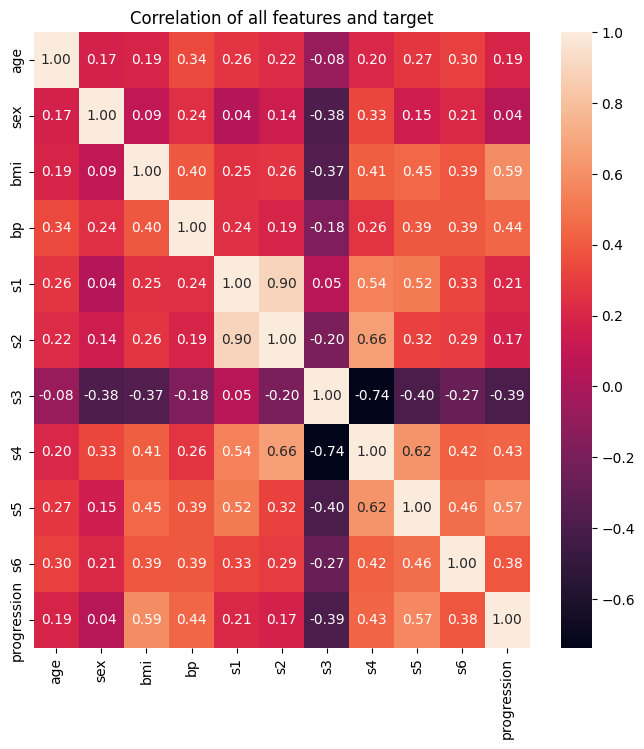

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')
plt.title('Correlation of all features and target')
plt.show()

In [ ]:
df_corr_target = df.corr()['progression'][:-1]

In [ ]:
sorted_corr = df_corr_target.sort_values()

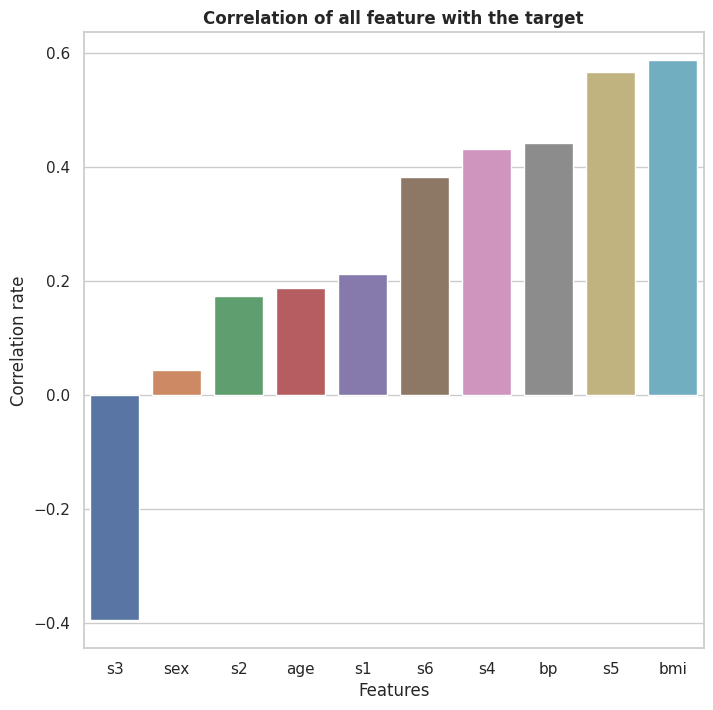

In [ ]:
plt.figure(figsize=(8,8))
sns.set(style='whitegrid')
sns.barplot(x = sorted_corr.index , y = sorted_corr.values)
plt.title('Correlation of all feature with the target', fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Correlation rate')
plt.show()

Dari hasil plot dapat disimpulkan bahwa bmi, s5, bp, dan s4 adalah features yang memiliki pengaruh paling tinggi terhadap hasil progression

##Visualization

### bmi dan progression

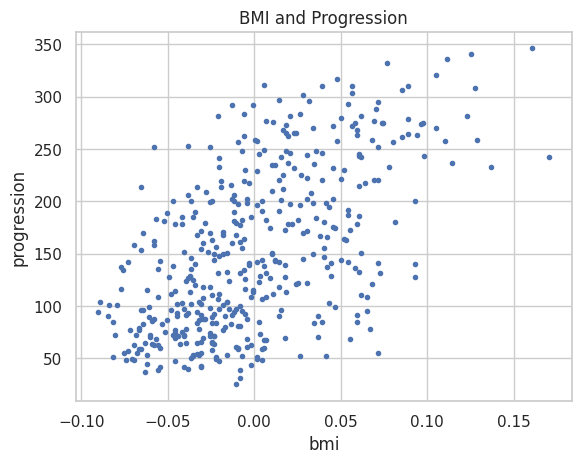

In [ ]:
plt.plot(df['bmi'], df['progression'], 'b.')
plt.title('BMI and Progression')
plt.xlabel('bmi')
plt.ylabel('progression')
plt.show()

Persebaran data mengenai bmi dan progression standar, namun secara keseluruhan semakin tinggi nilai bmi semakin tinggi pula nilai progression.

### s5 dan progression

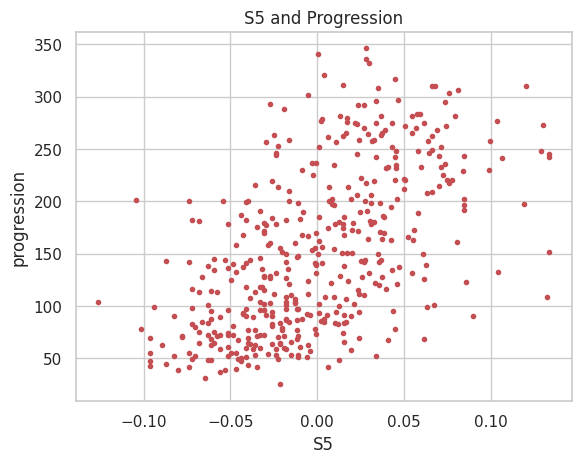

In [ ]:
plt.plot(df['s5'], df['progression'], 'r.')
plt.title('S5 and Progression')
plt.xlabel('S5')
plt.ylabel('progression')
plt.show()

Persebaran data mengenai S5 dan progression termausk besar karena ada beberapa kasus yang memiliki nilai s5 tinggi namun progression rendah dan sebaliknya

#Preprocessing Data
1. Missing value treatment
1. Outliers treatment
1. Standarization
1. Train Test Split

##Missing value treatment

In [ ]:
nan = df[df.isna().any(axis=1)]
nan

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression


Tidak ada data yang  memiliki missing value sehingga tidak diperlukan missing value treatment

##Outliers Treatment

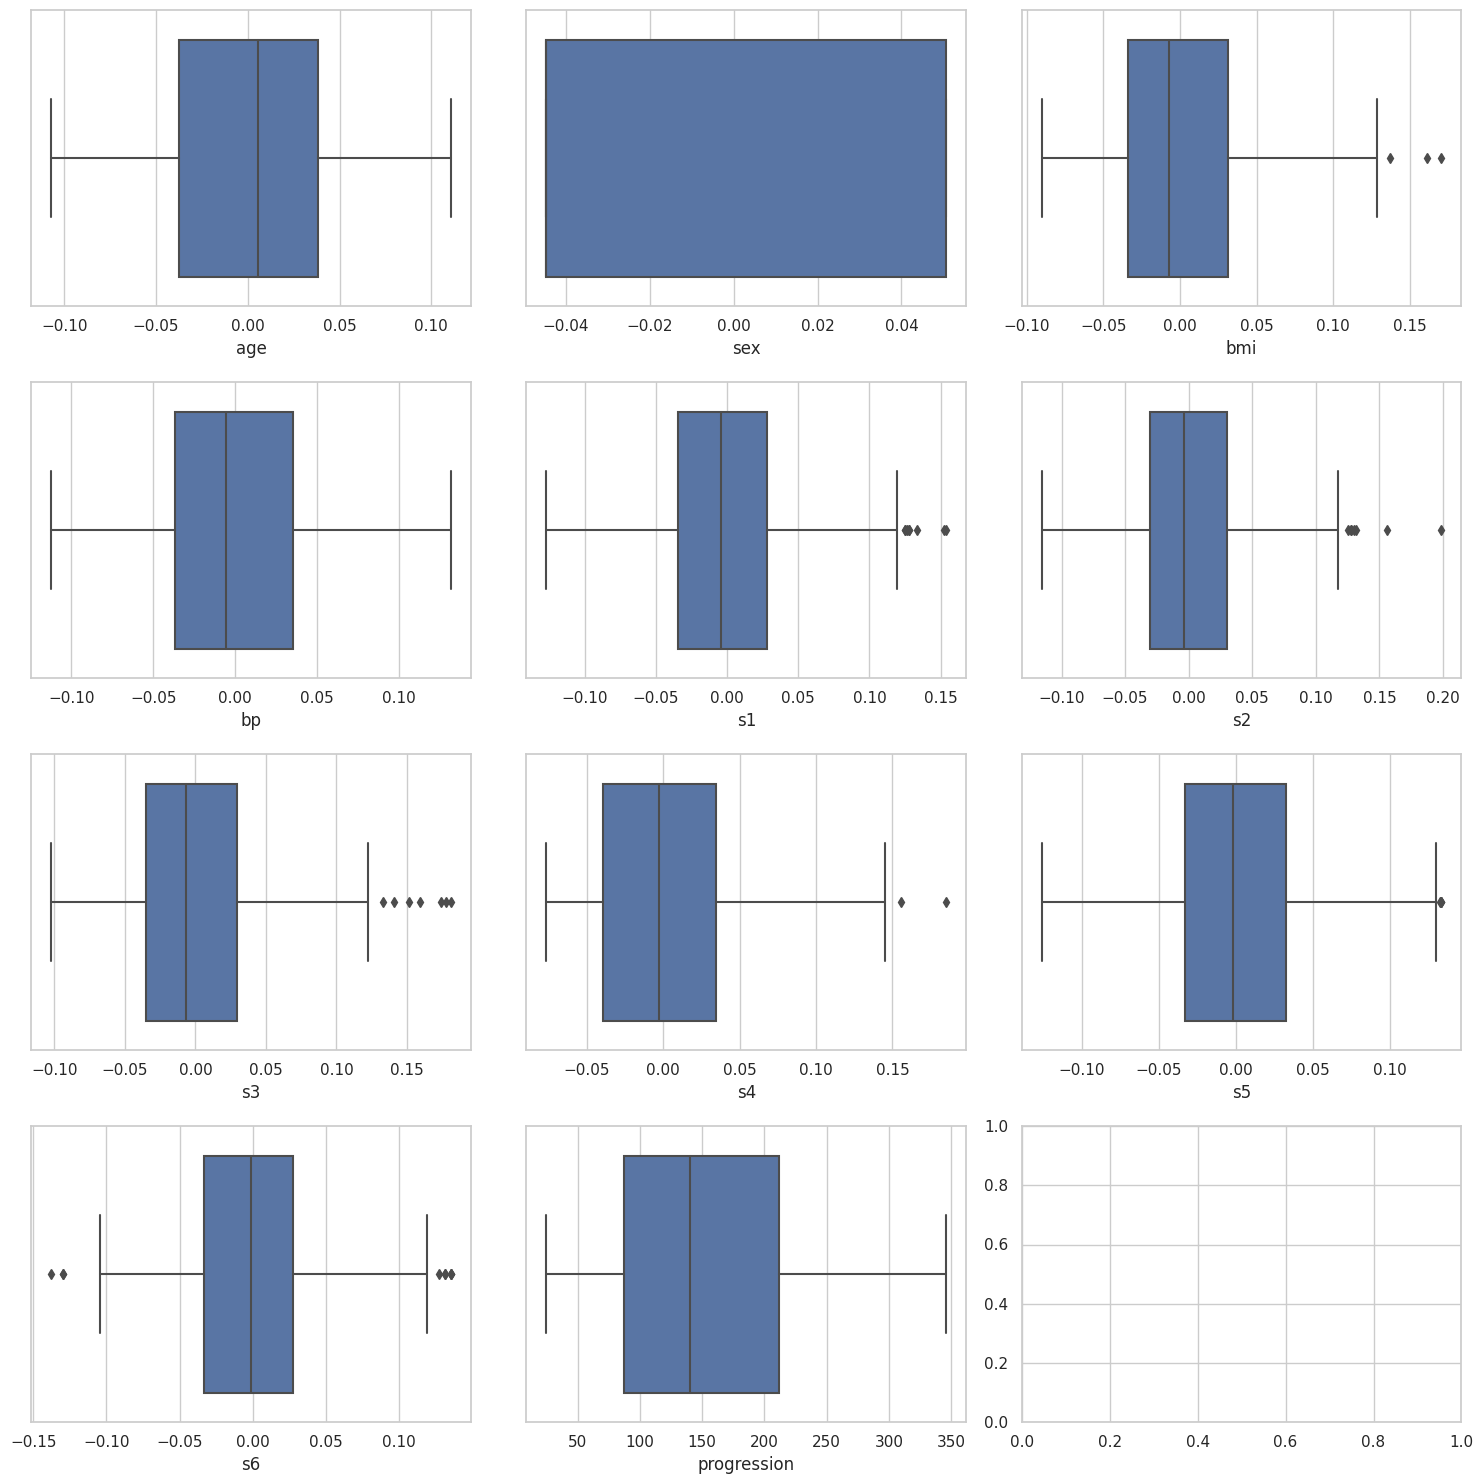

In [ ]:
total_row = (len(df.columns)+2) // 3
fig, axes = plt.subplots(nrows = total_row, ncols = 3, figsize=(15,15))

for i, col in enumerate(df.columns):
  sns.boxplot(data = df, x = col, ax = axes[i//3, i%3])
plt.tight_layout()
plt.show()

Ada beberapa feature yang memiliki outliers seperti pada feature bmi, s1, s2, s3, s4, s5, dan s6. Karena ada outlier maka perlu dilakukan outlier treatment.

In [ ]:
def find_outliers(df, col_name):
  Q1 = df[col_name].quantile(0.25)
  Q3 = df[col_name].quantile(0.75)
  IQR = Q3-Q1
  fence_low  = Q1-1.5*IQR
  fence_high = Q3+1.5*IQR
  outlier_list=((df[col_name] <= fence_low) | (df[col_name] >= fence_high)).tolist() #detect outlier
  outlier_indexes=[i for i, x in enumerate(outlier_list) if x]
  return outlier_indexes

In [ ]:
def outlier_treatment(df,colname):
  Q1 = df[colname].quantile(0.25) #quartile 1
  Q3 = df[colname].quantile(0.75) #quartile 2
  IQR = Q3-Q1
  lowfence = Q1-1.5*IQR
  highfence = Q3+1.5*IQR
  df[colname]=np.where(df[colname]>highfence,highfence,np.where(df[colname]<lowfence,lowfence,df[colname])) #treatment for outliers

In [ ]:
for colname in df.columns:
  columname = colname
  columname =  str(columname)
  outliers = find_outliers(df,columname)

  if len(outliers)>0:
    print(f"Outliers found in column {colname}")
    outlier_treatment(df, columname)

Outliers found in column bmi
Outliers found in column s1
Outliers found in column s2
Outliers found in column s3
Outliers found in column s4
Outliers found in column s5
Outliers found in column s6


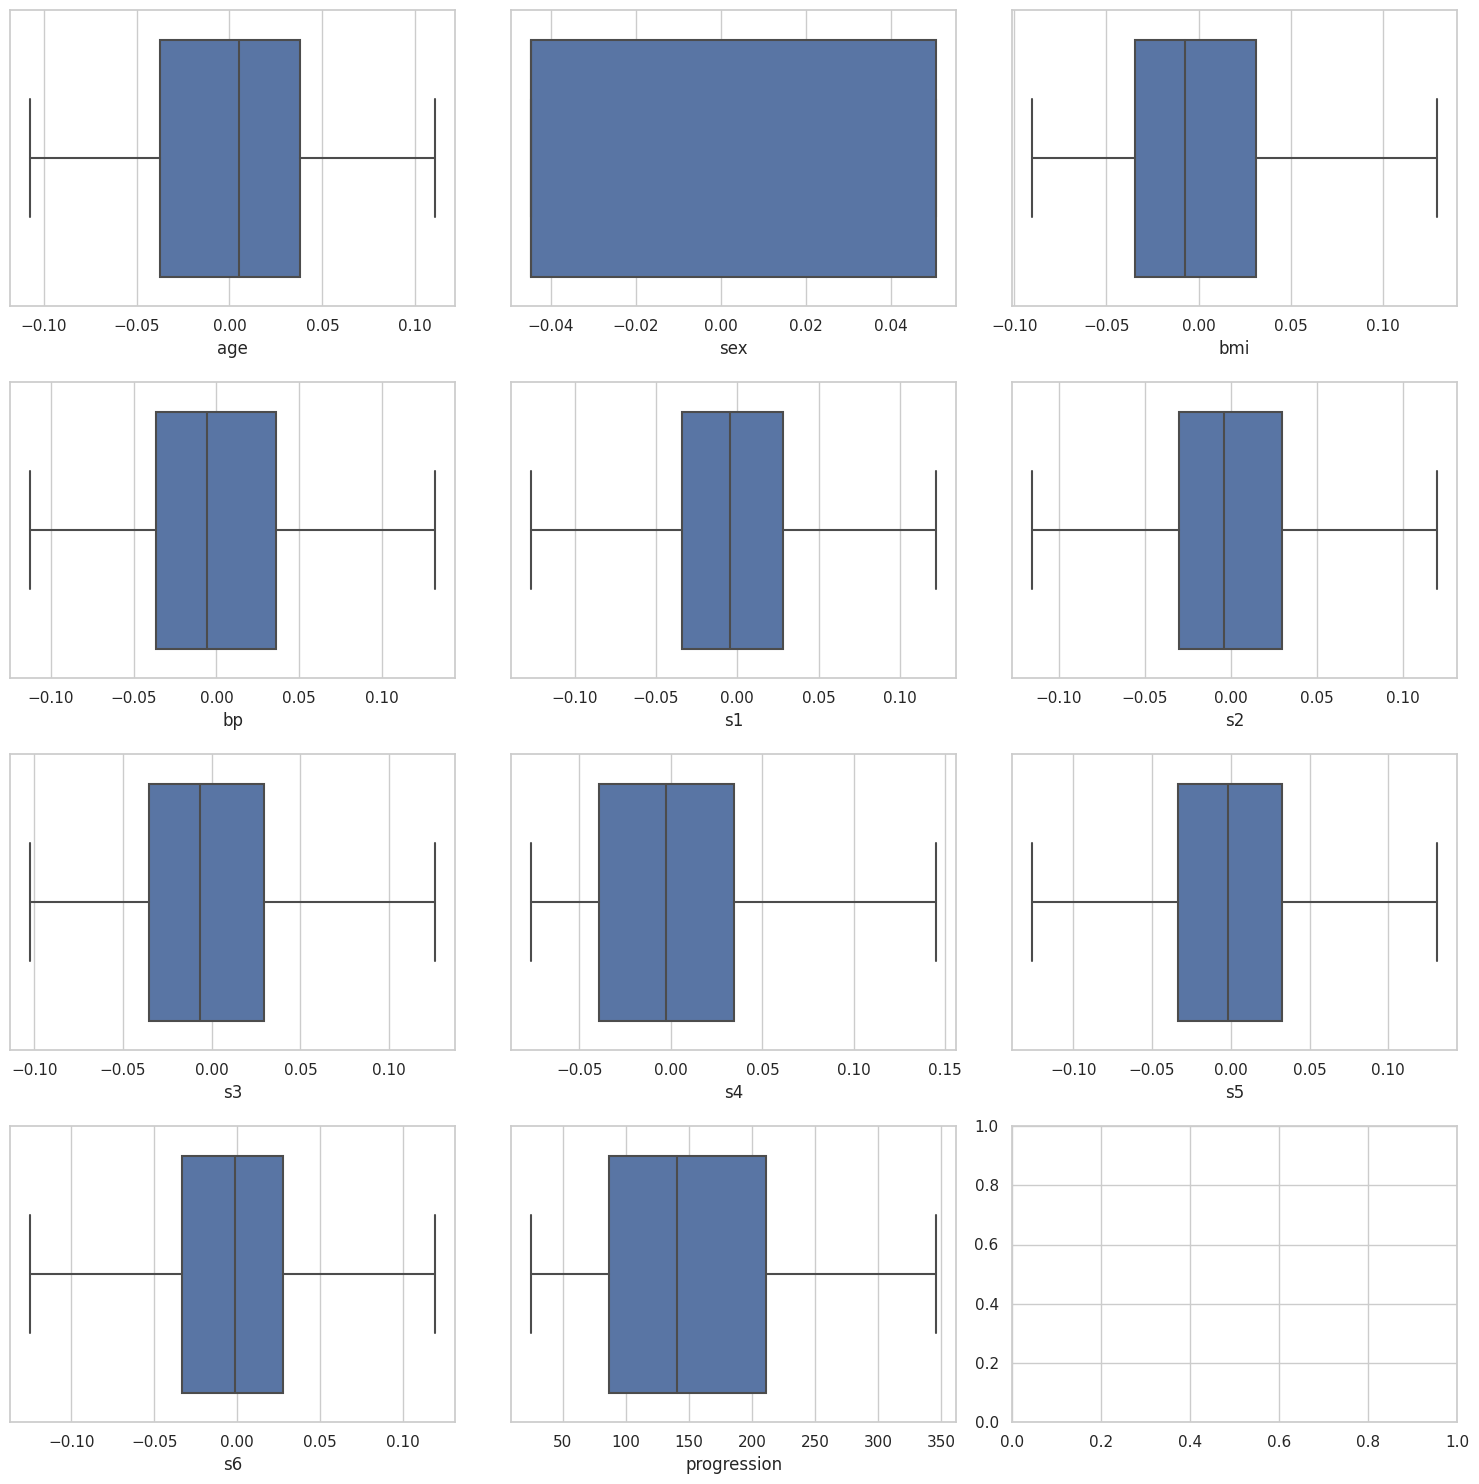

In [ ]:
total_row = (len(df.columns)+2) // 3
fig, axes = plt.subplots(nrows = total_row, ncols = 3, figsize=(15,15))

for i, col in enumerate(df.columns):
  sns.boxplot(data = df, x = col, ax = axes[i//3, i%3])
plt.tight_layout()
plt.show()

Pada boxplot sudah tidak ada lagi data yang bersifat outlier

##Pisah Variabel Features (X) dan variabel target (y)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

##Standarization

Digunakan untuk standarisasi skala sehingga semua data feature berada pada skala 0-1

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

##Train Test Split

Digunakan untuk memisahkan data yang akan digunakan untuk proses training dan testing model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#Modelling (combine sith hyperparameter tuning)
1. Linear regression
2. Polynomial regression
3. Ridge Regularization
4. Lasso Regularization
5. ElasticNet Regularization
6. BayesianRidge Regularization

In [ ]:
from sklearn.model_selection import GridSearchCV

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_lin_reg = lin_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_lin_reg = mean_squared_error(y_test, y_lin_reg)
print(f"Testing Score (MSE) using Linear Regression : ", mse_lin_reg)


Testing Score (MSE) using Linear Regression :  2856.3488843562873


In [ ]:
X_lin_reg_fitted = X_train
y_lin_reg_fitted = lin_reg.coef_[0]*X_train + lin_reg.intercept_

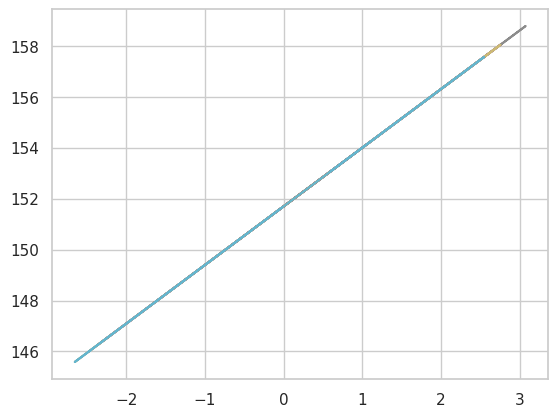

In [ ]:
plt.plot(X_lin_reg_fitted, y_lin_reg_fitted)

##Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
y_pol_reg = pol_reg.predict(X_poly_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_pol_reg = mean_squared_error(y_test, y_pol_reg)
print(f"Testing Score (MSE) using Polynomial Regression : ", mse_pol_reg)


Testing Score (MSE) using Polynomial Regression :  87338.59815608873


In [ ]:
X_pol_reg_fitted = np.linspace(X_train.min(), X_train.max(), num=100)
y_pol_reg_fitted = pol_reg.intercept_

In [ ]:
for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_pol_reg_fitted = y_pol_reg_fitted + pol_reg.coef_[i]*(X_pol_reg_fitted**exponent)

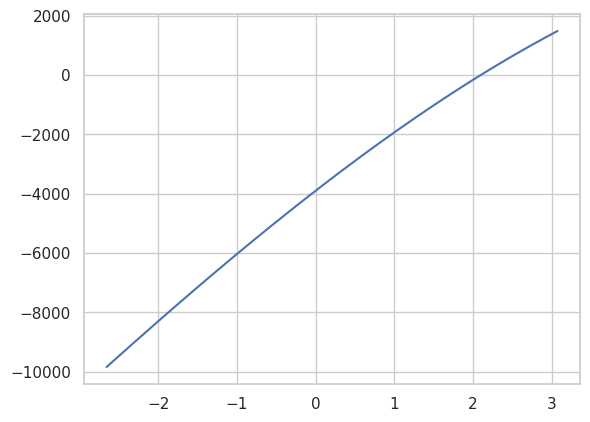

In [ ]:
plt.plot(X_pol_reg_fitted, y_pol_reg_fitted)
plt.show()

##Ridge Regularization

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_poly_train, y_train)

Ridge()

In [ ]:
y_ridge = ridge.predict(X_poly_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_ridge = mean_squared_error(y_test, y_ridge)
print(f"Testing Score (MSE) using Ridge Regularization : ", mse_ridge)


Testing Score (MSE) using Ridge Regularization :  8170.116646272989


In [ ]:
X_ridge_fitted = np.linspace(X_train.min(), X_train.max(), num=100)
y_ridge_fitted = ridge.intercept_

In [ ]:
for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_ridge_fitted = y_ridge_fitted + ridge.coef_[i]*(X_ridge_fitted**exponent)

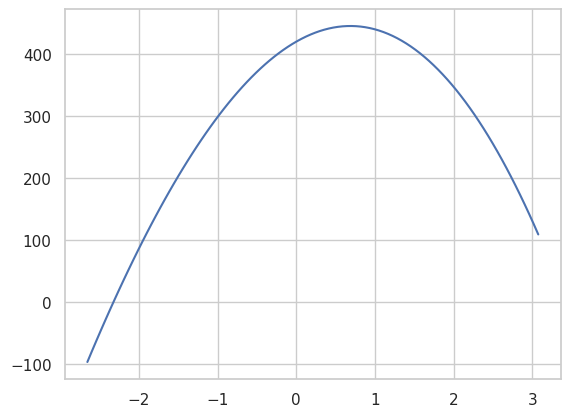

In [ ]:
plt.plot(X_ridge_fitted, y_ridge_fitted)
plt.show()

##Lasso Regularization

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_poly_train, y_train)

Lasso()

In [ ]:
y_lasso = lasso.predict(X_poly_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_lasso = mean_squared_error(y_test, y_lasso)
print(f"Testing Score (MSE) using Lasso Regularization : ", mse_lasso)


Testing Score (MSE) using Lasso Regularization :  3079.0509211472518


In [ ]:
X_lasso_fitted = np.linspace(X_train.min(), X_train.max(), num=100)
y_lasso_fitted = lasso.intercept_

In [ ]:
for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_lasso_fitted = y_lasso_fitted + lasso.coef_[i]*(X_lasso_fitted**exponent)

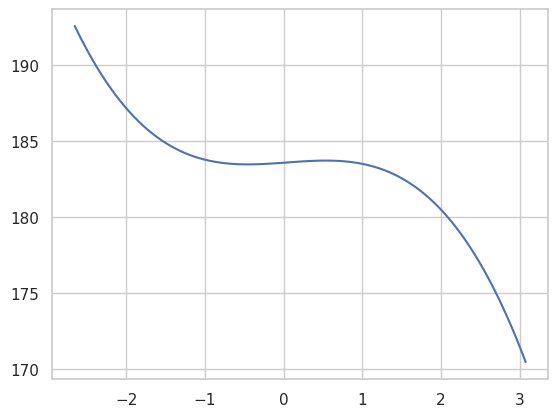

In [ ]:
plt.plot(X_lasso_fitted, y_lasso_fitted)
plt.show()

##ElasticNet Regularization

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_poly_train, y_train)

ElasticNet()

In [ ]:
y_elastic = elastic.predict(X_poly_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_elastic = mean_squared_error(y_test, y_elastic)
print(f"Testing Score (MSE) using ElasticNet Regularization : ", mse_elastic)


Testing Score (MSE) using ElasticNet Regularization :  3189.036639839626


In [ ]:
X_elastic_fitted = np.linspace(X_train.min(), X_train.max(), num=100)
y_elastic_fitted = elastic.intercept_

In [ ]:
for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_elastic_fitted = y_elastic_fitted + elastic.coef_[i]*(X_elastic_fitted**exponent)

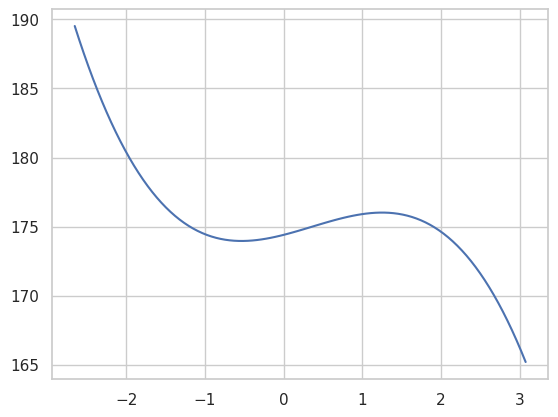

In [ ]:
plt.plot(X_elastic_fitted, y_elastic_fitted)
plt.show()

##BayesianRidge Regularization

In [ ]:
from sklearn.linear_model import BayesianRidge
bayes = BayesianRidge()
bayes.fit(X_poly_train, y_train)

BayesianRidge()

In [ ]:
y_bayes = bayes.predict(X_poly_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_bayes = mean_squared_error(y_test, y_bayes)
print(f"Testing Score (MSE) using BayesianRidge Regularization : ", mse_bayes)


Testing Score (MSE) using BayesianRidge Regularization :  3281.8284120835597


In [ ]:
X_bayes_fitted = np.linspace(X_train.min(), X_train.max(), num=100)
y_bayes_fitted = bayes.intercept_

In [ ]:
for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_bayes_fitted = y_bayes_fitted + bayes.coef_[i]*(X_bayes_fitted**exponent)

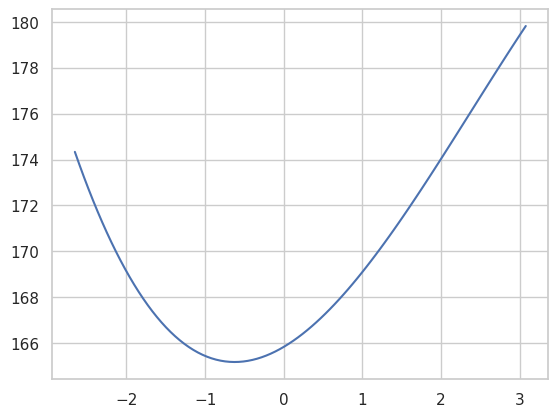

In [ ]:
plt.plot(X_bayes_fitted, y_bayes_fitted)
plt.show()

##Perbandingan Model tanpa Regularisasi dan dengan Regularisasi

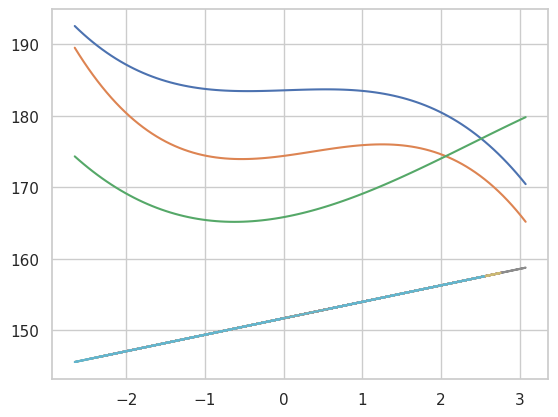

In [ ]:
#Linear Regression
plt.plot(X_lin_reg_fitted, y_lin_reg_fitted)

#Polynomial Regression (Worst Model)
#plt.plot(X_pol_reg_fitted, y_pol_reg_fitted)

#Ridge Regularization (2nd worst model)
#plt.plot(X_ridge_fitted, y_ridge_fitted)

#Lasso Regularization
plt.plot(X_lasso_fitted, y_lasso_fitted)

#ElasticNet Regularization
plt.plot(X_elastic_fitted, y_elastic_fitted)

#BayesianRidge Regularization
plt.plot(X_bayes_fitted, y_bayes_fitted)


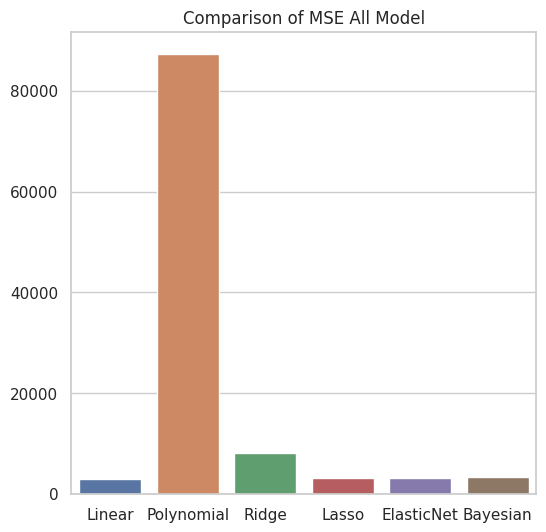

In [ ]:
a = ['Linear', 'Polynomial', 'Ridge', 'Lasso', 'ElasticNet', 'Bayesian']
b = [mse_lin_reg, mse_pol_reg, mse_ridge, mse_lasso, mse_elastic, mse_bayes]

plt.figure(figsize=(6,6))
sns.barplot(x = a, y = b)
plt.title('Comparison of MSE All Model')
plt.show()

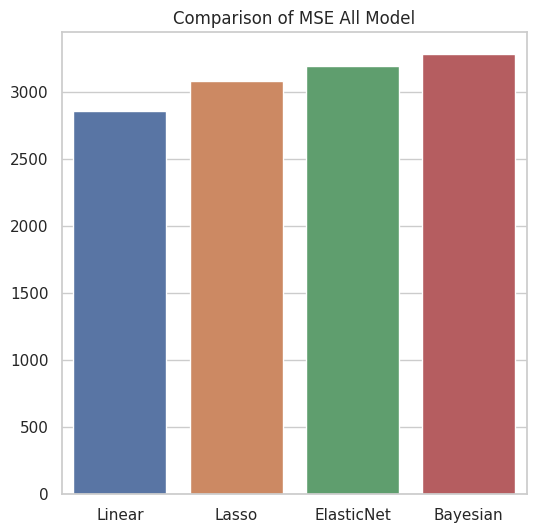

In [ ]:
a = ['Linear', 'Lasso', 'ElasticNet', 'Bayesian']
b = [mse_lin_reg, mse_lasso, mse_elastic, mse_bayes]

plt.figure(figsize=(6,6))
sns.barplot(x = a, y = b)
plt.title('Comparison of MSE All Model')
plt.show()

Semakin rendah nilai MSE, maka model yang dibuat semakin baik. Berdasarkan keenam model tersebut, model terbaik adalah Linear Regression